In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('scraped_cars.csv')

In [3]:
df.head()

,name,mpg,cylinders,horse_power,weight,acceleration,year,country,displacement
0,Chevrolet Chevelle Malibu,18.0,8,130.0,3504,12.0,1970,USA,7.0
1,Buick Skylark 320,15.0,8,165.0,3693,11.5,1970,USA,0.0
2,Plymouth Satellite,18.0,8,150.0,3436,11.0,1970,USA,8.0
3,Amc Rebel Sst,16.0,8,150.0,3433,12.0,1970,USA,4.0
4,Ford Torino,17.0,8,140.0,3449,10.5,1970,USA,2.0


In [7]:
df.sample(10)

,name,mpg,cylinders,horse_power,weight,acceleration,year,country,displacement
239,Ford Thunderbird,16.0,8,149.0,4335,14.5,1977,USA,1.0
316,Vw Rabbit,41.5,4,76.0,2144,14.7,1980,Europe,8.0
29,Bmw 2002,26.0,4,113.0,2234,12.5,1970,Europe,1.0
167,Buick Century,17.0,6,110.0,3907,21.0,1975,USA,1.0
336,Honda Civic 1500 Gl,44.6,4,67.0,1850,13.8,1980,Japan,1.0
153,Dodge Colt,28.0,4,75.0,2125,14.5,1974,USA,0.0
87,Ford Pinto (Sw),22.0,4,86.0,2395,16.0,1972,USA,2.0
205,Honda Civic,33.0,4,53.0,1795,17.4,1976,Japan,1.0
156,Honda Civic,24.0,4,97.0,2489,15.0,1974,Japan,0.0
43,Ford Torino 500,19.0,6,88.0,3302,15.5,1971,USA,0.0


In [9]:
df.isnull().sum()

name            0
mpg             8
cylinders       0
horse_power     6
weight          0
acceleration    0
year            0
country         0
displacement    0
dtype: int64

In [10]:
df.describe()

,mpg,cylinders,horse_power,weight,acceleration,year,displacement
count,398.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,105.082500,2979.413793,15.519704,1975.921182,3.498768
std,7.815984,1.712160,38.768779,847.004328,2.803359,3.748737,3.211572
min,9.000000,3.000000,46.000000,1613.000000,8.000000,1970.000000,0.000000
25%,17.500000,4.000000,75.750000,2226.500000,13.700000,1973.000000,0.000000
50%,23.000000,4.000000,95.000000,2822.500000,15.500000,1976.000000,2.000000
75%,29.000000,8.000000,130.000000,3618.250000,17.175000,1979.000000,7.000000
max,46.600000,8.000000,230.000000,5140.000000,24.800000,1982.000000,9.000000


In [17]:
df.cylinders.value_counts()

4    207
8    108
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [22]:
df.cylinders.value_counts().sort_values(ascendig=True)

TypeError: sort_values() got an unexpected keyword argument 'ascendig'

In [25]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df.shape

(406, 9)

Text(0.5, 1.0, 'count of cylinders')

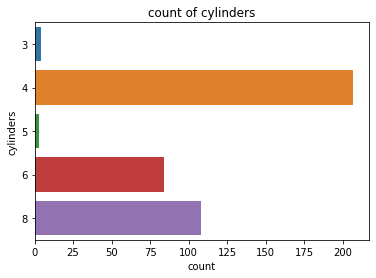

In [31]:
ax = sns.countplot(data=df, y='cylinders')
ax.set_title('count of cylinders')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982')])

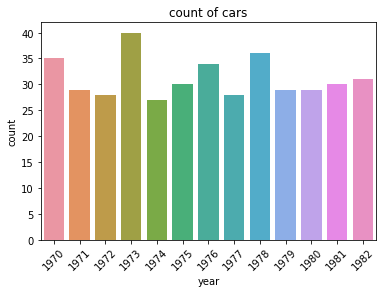

In [33]:
ax = sns.countplot(data=df, x='year')
ax.set_title('count of cars')
plt.xticks(rotation=45)

In [35]:
df.mpg.isnull()[1:12]

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
Name: mpg, dtype: bool

In [40]:
def highlight_max(s):
    """Highlight the max in a series by yellow"""
    ismax = s == s.max()
    return ['background-color: yellow' if x else '' for x in ismax]
df.pivot_table(index=['year'], aggfunc='count').style.apply(highlight_max, axis=1)

,acceleration,country,cylinders,displacement,horse_power,mpg,name,weight
year,,,,,,,,
1970,35,35,35,35,35,29,35,35
1971,29,29,29,29,28,28,29,29
1972,28,28,28,28,28,28,28,28
1973,40,40,40,40,40,40,40,40
1974,27,27,27,27,26,27,27,27
1975,30,30,30,30,30,30,30,30
1976,34,34,34,34,34,34,34,34
1977,28,28,28,28,28,28,28,28
1978,36,36,36,36,36,36,36,36


In [41]:
df = df.query('cylinders != 3 and cylinders != 5').copy()

In [42]:
df.shape

(399, 9)

In [44]:
df.cylinders.value_counts().sort_index()

4    207
6     84
8    108
Name: cylinders, dtype: int64

In [46]:
df['cylinders_label'] = df.cylinders.apply(lambda x: f'{x} cylinders' )

In [47]:
df.head(
)

,name,mpg,cylinders,horse_power,weight,acceleration,year,country,displacement,cylinders_label
0,Chevrolet Chevelle Malibu,18.0,8,130.0,3504,12.0,1970,USA,7.0,8 cylinders
1,Buick Skylark 320,15.0,8,165.0,3693,11.5,1970,USA,0.0,8 cylinders
2,Plymouth Satellite,18.0,8,150.0,3436,11.0,1970,USA,8.0,8 cylinders
3,Amc Rebel Sst,16.0,8,150.0,3433,12.0,1970,USA,4.0,8 cylinders
4,Ford Torino,17.0,8,140.0,3449,10.5,1970,USA,2.0,8 cylinders


Text(0.5, 1.0, 'mpg hist')

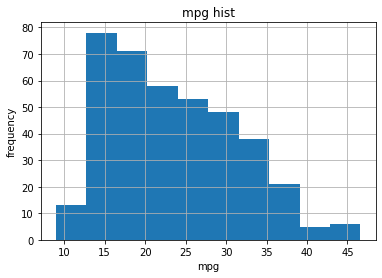

In [49]:
ax = df.mpg.hist()
ax.set_ylabel('frequency')
ax.set_xlabel('mpg')
ax.set_title('mpg hist')

In [50]:
df.pivot_table(index=['year'], aggfunc='mean')

,acceleration,cylinders,displacement,horse_power,mpg,weight
year,,,,,,
1970,12.714286,6.857143,3.714286,148.857143,17.689655,3441.314286
1971,15.310345,5.517241,3.103448,104.928571,21.250000,2960.344828
1972,15.185185,5.925926,3.500000,121.037037,18.703704,3271.333333
1973,14.333333,6.461538,3.205128,131.512821,17.076923,3452.230769
1974,16.203704,5.259259,3.962963,94.230769,22.703704,2877.925926
1975,16.050000,5.600000,2.200000,101.066667,20.266667,3176.800000
1976,15.941176,5.647059,3.676471,101.117647,21.573529,3078.735294
1977,15.507407,5.555556,3.666667,104.888889,23.444444,3007.629630
1978,15.802857,5.371429,4.000000,99.600000,24.168571,2862.714286


In [53]:
df.corr()['mpg'].sort_values()

weight         -0.842035
cylinders      -0.792406
horse_power    -0.780259
displacement    0.249921
acceleration    0.416320
year            0.578522
mpg             1.000000
Name: mpg, dtype: float64

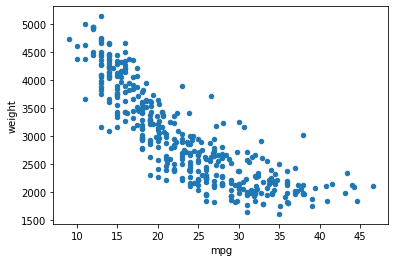

In [54]:
ax = df.plot(kind='scatter', x='mpg', y='weight')

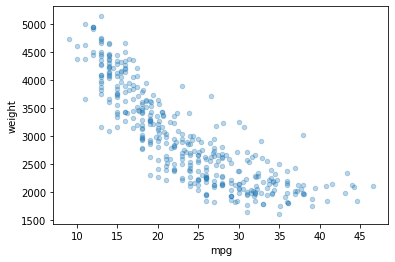

In [57]:
ax = df.plot(kind='scatter', x='mpg', y='weight', alpha=0.3)

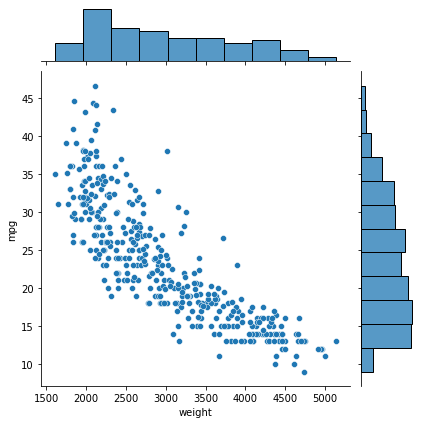

In [59]:
jp = sns.jointplot(data=df, y='mpg', x='weight')

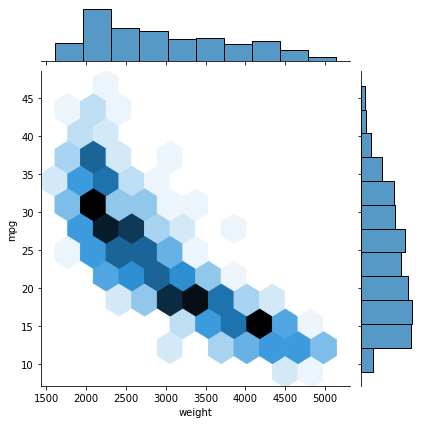

In [61]:
jp = sns.jointplot(data=df, y='mpg', x='weight', kind='hex')

In [63]:
df.cylinders.value_counts().sort_index()

4    207
6     84
8    108
Name: cylinders, dtype: int64

Text(0.5, 0, 'cyl')

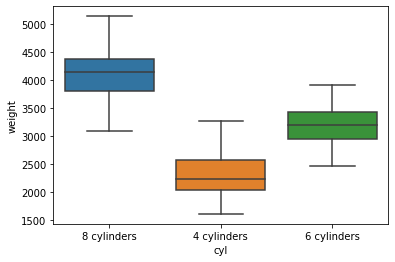

In [75]:
ax = sns.boxplot(data=df, x='cylinders_label', y='weight')
ax.set_xlabel('cyl')
# dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_cachedRenderer',
 '_callbacks',
 '_canvas_callbacks',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_get_draw_artists',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutgrid',
 '_localaxes',
 '_mouseover',
 '_normalize_grid_string',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_rasterized',
 '_r

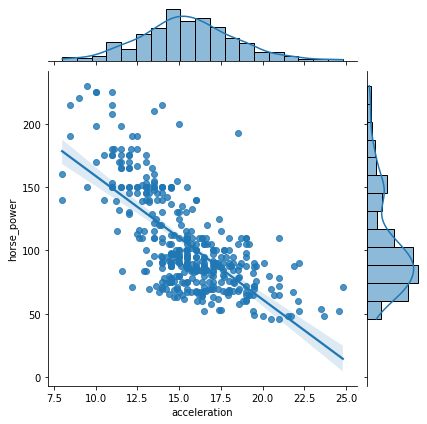

In [76]:
jg = sns.jointplot(data=df, y='horse_power', x='acceleration', kind='reg')
dir(jg.fig)